In [1]:
import sys
from pathlib import Path
current_path = %pwd
parent_path = Path(current_path).parent
print("parent path", parent_path)
sys.path.append(str(parent_path))

parent path /home/mchiuminatto/work/dev/triple_barrier


In [2]:
import pandas as pd
import numpy as np
from triple_barrier.plots import PlotTripleBarrier
from triple_barrier.triple_barrier import TradeSide
from triple_barrier import constants
from tests.triple_barrier.conftest import calculate_test_features

In [3]:
price = calculate_test_features()

In [4]:
price["2023-01-02 20:45:00":].head(12)

,open,high,low,close,volume,mva-12,mva-24,entry-signal,entry,exit-signal,exit
date-time,,,,,,,,,,,
2023-01-02 20:45:00,1.06709,1.06718,1.06692,1.06716,725.66,1.06685,1.06681,NaN,1.0,NaN,NaN
2023-01-02 20:50:00,1.06715,1.06758,1.06709,1.06753,908.83,1.06692,1.06685,NaN,NaN,NaN,NaN
2023-01-02 20:55:00,1.06750,1.06778,1.06742,1.06770,974.14,1.06698,1.06688,NaN,NaN,NaN,NaN
2023-01-02 21:00:00,1.06770,1.06788,1.06722,1.06782,1372.54,1.06696,1.06691,NaN,NaN,NaN,NaN
2023-01-02 21:05:00,1.06782,1.06786,1.06732,1.06766,773.67,1.06693,1.06695,NaN,NaN,1.0,NaN
2023-01-02 21:10:00,1.06766,1.06783,1.06740,1.06762,1331.83,1.06703,1.06698,NaN,NaN,NaN,1.0
2023-01-02 21:15:00,1.06763,1.06764,1.06711,1.06714,644.85,1.06718,1.06700,NaN,NaN,NaN,NaN
2023-01-02 21:20:00,1.06713,1.06724,1.06685,1.06701,704.79,1.06725,1.06701,NaN,NaN,NaN,NaN
2023-01-02 21:25:00,1.06701,1.06701,1.06669,1.06690,627.56,1.06729,1.06702,NaN,NaN,NaN,NaN


In [5]:
plotter = PlotTripleBarrier(open_price = price[constants.OPEN],
                            high_price = price[constants.HIGH],
                            low_price = price[constants.LOW],
                            close_price = price[constants.CLOSE],
                            pip_decimal_position=4,
                            overlay_features=[ price["mva-12"], price["mva-24"]]
                           )

Plotting barrier for 51
Open price 1.06709
Take profit 1.06759
Stop loss 1.0665900000000001
Time barrier 2023-01-02 21:35:00


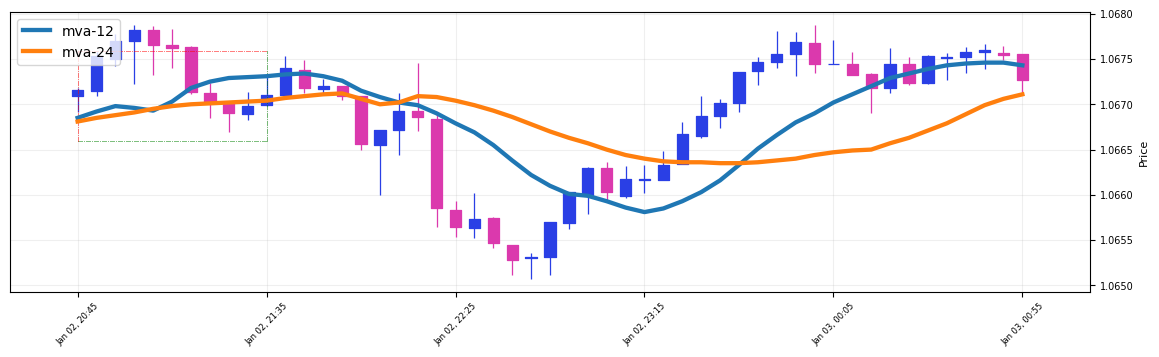

In [6]:
plotter.plot_triple_barrier(entry_period="2023-01-02 20:45:00",
                            take_profit_width=5,
                            stop_loss_width=5,
                            time_barrier_periods=10,
                            trade_side=TradeSide.BUY
                            )

Plotting barrier for 51
Open price 1.06709
Take profit 1.0660900000000002
Stop loss 1.06759
Time barrier 2023-01-02 22:50:00


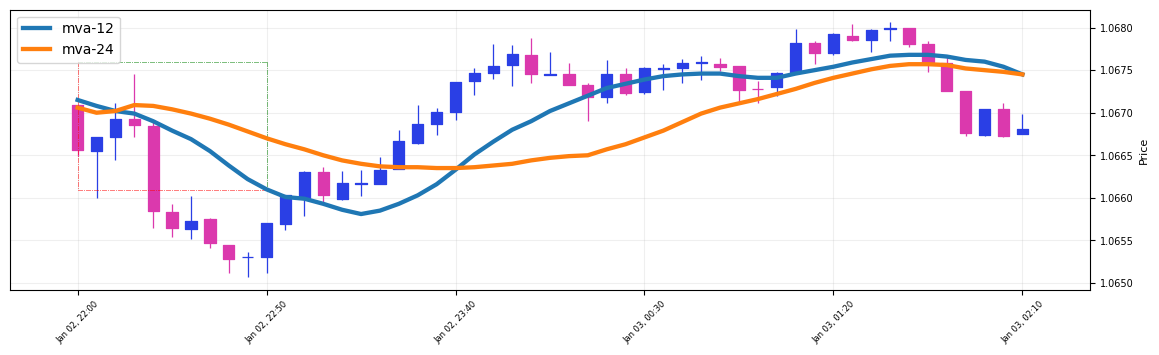

In [7]:
plotter.plot_triple_barrier(entry_period="2023-01-02 22:00:00",
                            take_profit_width=10,
                            stop_loss_width=5,
                            time_barrier_periods=10,
                            trade_side=TradeSide.SELL
                            )

Plotting barrier for 51
Open price 1.06709
Take profit 1.06759
Stop loss -inf
Time barrier 2023-01-02 21:35:00


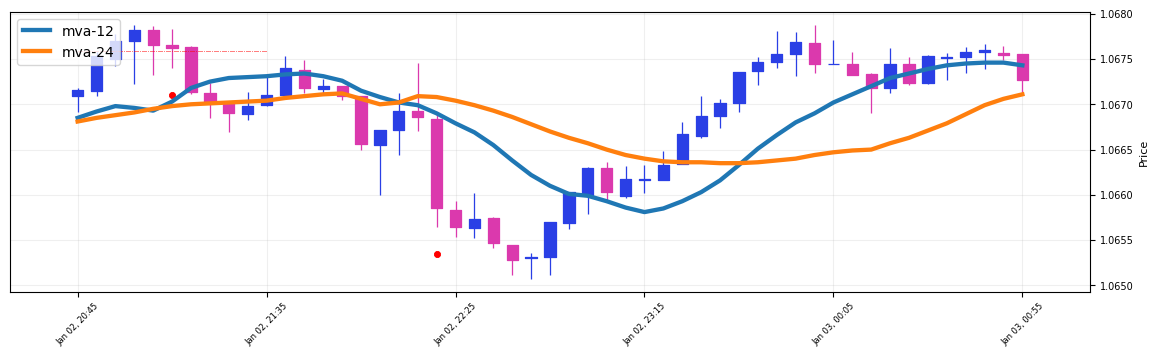

In [11]:
exit_mark_mask = price["exit"] == 1
price.loc[exit_mark_mask, "exit-mark"] = price[exit_mark_mask]["low"] - 3/10000

plotter.plot_triple_barrier(entry_period="2023-01-02 20:45:00",
                            take_profit_width=5,
                            stop_loss_width=np.inf,
                            time_barrier_periods=10,
                            dynamic_exit = price["exit-mark"],
                            trade_side=TradeSide.BUY
                            )

In [9]:
price["2023-01-02 20:45:00":].head(11)

,open,high,low,close,volume,mva-12,mva-24,entry-signal,entry,exit-signal,exit,exit-mark
date-time,,,,,,,,,,,,
2023-01-02 20:45:00,1.06709,1.06718,1.06692,1.06716,725.66,1.06685,1.06681,NaN,1.0,NaN,NaN,NaN
2023-01-02 20:50:00,1.06715,1.06758,1.06709,1.06753,908.83,1.06692,1.06685,NaN,NaN,NaN,NaN,NaN
2023-01-02 20:55:00,1.06750,1.06778,1.06742,1.06770,974.14,1.06698,1.06688,NaN,NaN,NaN,NaN,NaN
2023-01-02 21:00:00,1.06770,1.06788,1.06722,1.06782,1372.54,1.06696,1.06691,NaN,NaN,NaN,NaN,NaN
2023-01-02 21:05:00,1.06782,1.06786,1.06732,1.06766,773.67,1.06693,1.06695,NaN,NaN,1.0,NaN,NaN
2023-01-02 21:10:00,1.06766,1.06783,1.06740,1.06762,1331.83,1.06703,1.06698,NaN,NaN,NaN,1.0,1.0671
2023-01-02 21:15:00,1.06763,1.06764,1.06711,1.06714,644.85,1.06718,1.06700,NaN,NaN,NaN,NaN,NaN
2023-01-02 21:20:00,1.06713,1.06724,1.06685,1.06701,704.79,1.06725,1.06701,NaN,NaN,NaN,NaN,NaN
2023-01-02 21:25:00,1.06701,1.06701,1.06669,1.06690,627.56,1.06729,1.06702,NaN,NaN,NaN,NaN,NaN
